

# Project: Investigating the factors determining US gun purchases.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report I have cleaned and analysed two datasets, namely US census data and US gun data from the US government website.
>
>
> Below are the questions I shall be looking to answer:
> Is the gun sales per capita (of each state) correllated with racial demographics?
> Is the gun sales per capita correllated with median household income
> Is the gun sales per capita correllated with education


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('darkgrid')





<a id='wrangling'></a>
## Data Wrangling



### General Properties

The census data has a number of issues that required fixing. The first of which is random  rows at the bottom of the dataframe.

In [3]:
df_gun = pd.read_csv('gun-data.csv')
df_us = pd.read_csv('us-census-data.csv')

In [4]:
df_us.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# delete random rows below the data set
df_us = df_us.drop(index = df_us.index[65:])
df_us.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


> The next issue issue is that the states are the column headers, rather than being row labels, this is inconsistent witht the gun dataframe and so should be changed.

In [6]:
# transpose the data to swap axis 
df_us_trans = df_us.transpose()



df_us_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""


> Whilst the states are now correctly assigned as the row index, we have a few untidy and unnecessary rows at the top of the dataframe. We also have 65 columns which contains more information than we need. 
>
>Below we have extracted columns of interest and set the 'Fact' row as the column headings as this correctly describes the data

In [6]:
# extract columns containing data of interest
df_us_trans1 = df_us_trans[[0,3,12,13,24,47]]
# set the fist row to column headings
df_us_trans1.columns = df_us_trans1.iloc[0]
# delete unnecessary rows
df_us_trans1 = (df_us_trans1[2:])
df_us_trans1.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","Owner-occupied housing unit rate, 2011-2015","Median household income (in 2015 dollars), 2011-2015"
Alabama,"4,863,300","4,779,736",69.30%,26.80%,68.70%,"$43,623"
Alaska,"741,894","710,231",66.10%,3.80%,63.40%,"$72,515"
Arizona,"6,931,071","6,392,017",83.30%,4.90%,62.80%,"$50,255"
Arkansas,"2,988,248","2,915,918",79.40%,15.70%,66.10%,"$41,371"
California,"39,250,017","37,253,956",72.70%,6.50%,54.30%,"$61,818"


> The names are unnecessarily long, now that we have the columns of interest only, it is appropriate to rename them at this point. 

In [7]:
# df_us_trans1.rename(columns ={"Population estimates, July 1, 2016, (V2016)":"population_estimate_2016"})
df_us_trans1.rename(columns ={"Population estimates, July 1, 2016,  (V2016)":"population, 2016",
                              "Population, Census, April 1, 2010":"population, 2010",
                             "White alone, percent, July 1, 2016,  (V2016)":"White%, 2016",
                             "Black or African American alone, percent, July 1, 2016,  (V2016)":"Black%, 2016",
                             "Owner-occupied housing unit rate, 2011-2015":"own_home% 2011-2015",
                             "Median household income (in 2015 dollars), 2011-2015":"median income($) 2011-2015"}, inplace=True)
df_us_trans1.head()


Fact,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015
Alabama,"4,863,300","4,779,736",69.30%,26.80%,68.70%,"$43,623"
Alaska,"741,894","710,231",66.10%,3.80%,63.40%,"$72,515"
Arizona,"6,931,071","6,392,017",83.30%,4.90%,62.80%,"$50,255"
Arkansas,"2,988,248","2,915,918",79.40%,15.70%,66.10%,"$41,371"
California,"39,250,017","37,253,956",72.70%,6.50%,54.30%,"$61,818"


> Now that the row index and column headings appear to be in order, we can look at the actual data. 
>
> The columns 'White%, 2016', 'Black%, 2016', 'own_home% 2011-2015' all should be floating poit numbers to reflect proportion in the form of a percentage. 
>
> However, these columns are currently of the string data type. Furthermore, some are formatted to look like a percentage, whilst others take the form of a decimal. 
>
>Do deal with this, I have written a function to deal with these two problems, and then used the 'applymap' method to itterate through the relevant elements of the dataframe.



In [8]:
# A function to clean the percentage cells

def sanitise_cell(x):
    try:
        if x[-1] == '%':
            x = float(x[:-1])
        else: 
            x = float(x)*100
    except:
        pass
    return x



In [9]:
pct_cols = ['White%, 2016',
       'Black%, 2016', 'own_home% 2011-2015']
df_us_trans1[pct_cols].head(3)

Fact,"White%, 2016","Black%, 2016",own_home% 2011-2015
Alabama,69.30%,26.80%,68.70%
Alaska,66.10%,3.80%,63.40%
Arizona,83.30%,4.90%,62.80%


In [10]:
# Applying the sanitise function to relevant columns of the dataframe
df_us_trans1[pct_cols] = df_us_trans1[pct_cols].applymap(sanitise_cell)

df_us_trans1[pct_cols].head(3)

Fact,"White%, 2016","Black%, 2016",own_home% 2011-2015
Alabama,69.3,26.8,68.7
Alaska,66.1,3.8,63.4
Arizona,83.3,4.9,62.8


In [11]:
df_us_trans1.columns

Index(['population, 2016', 'population, 2010', 'White%, 2016', 'Black%, 2016',
       'own_home% 2011-2015', 'median income($) 2011-2015'],
      dtype='object', name='Fact')

> As with the above percentages, the proportion columns are also currently strings. 
>
> To convert into integers, we need to first remove the commas using a lambda function and use astype to change the datatype. 

In [12]:
# remove commas from population columns and convert to integers
int_cols = ['population, 2016','population, 2010']
df_us_trans1[['population, 2016','population, 2010']] = df_us_trans1[['population, 2016','population, 2010']].apply(lambda x: x.str.replace(',','')).astype('int64')

df_us_trans1[['population, 2016','population, 2010']].head()

Fact,"population, 2016","population, 2010"
Alabama,4863300,4779736
Alaska,741894,710231
Arizona,6931071,6392017
Arkansas,2988248,2915918
California,39250017,37253956


In [13]:
df_us_trans1[['population, 2016','population, 2010']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   population, 2016  50 non-null     int64
 1   population, 2010  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2+ KB


In [14]:
df_us_trans1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   population, 2016            50 non-null     int64  
 1   population, 2010            50 non-null     int64  
 2   White%, 2016                50 non-null     float64
 3   Black%, 2016                50 non-null     float64
 4   own_home% 2011-2015         50 non-null     float64
 5   median income($) 2011-2015  50 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 2.7+ KB


> The final column to clean is the median household income column, this can be cleaned in the same way as the population data.

In [15]:
# finish cleaning the dtaframe by convertng median household income to ints and removing commas and $'s
df_us_trans1[['median income($) 2011-2015']] = df_us_trans1[['median income($) 2011-2015']].apply(lambda x: x.str.replace('$','').str.replace(',','').astype('int64'))


df_us_clean = df_us_trans1

In [16]:
df_us_clean.tail()

Fact,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015
Virginia,8411808,8001024,70.0,19.8,66.2,65015
Washington,7288000,6724540,80.0,4.1,62.5,61062
West Virginia,1831102,1852994,93.6,3.6,72.5,41751
Wisconsin,5778708,5686986,87.5,6.6,67.3,53357
Wyoming,585501,563626,92.8,1.3,69.1,58840


> Now that the census data is clean, we can sanitise the gun sales data.
>
> We can start by remving all the data for years before 2016.

In [17]:
df_gun['month'] = pd.to_datetime(df_gun['month'])

In [18]:
# delete rows other than in years 2016 and 2017

df_gun = df_gun.drop(index = df_gun.index[1155:])
df_gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1150,2016-01-01,Virginia,524.0,NaN,27033.0,15699.0,922.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,44181
1151,2016-01-01,Washington,19688.0,NaN,20427.0,11355.0,2147.0,595,4.0,10.0,...,9.0,NaN,NaN,555.0,458.0,29.0,5.0,11.0,0.0,58050
1152,2016-01-01,West Virginia,3378.0,NaN,7419.0,5505.0,321.0,349,3.0,5.0,...,0.0,NaN,NaN,5.0,7.0,2.0,0.0,0.0,0.0,18985
1153,2016-01-01,Wisconsin,9496.0,NaN,17969.0,10756.0,937.0,42,0.0,0.0,...,1.0,NaN,NaN,6.0,5.0,0.0,0.0,1.0,0.0,39561
1154,2016-01-01,Wyoming,959.0,NaN,2181.0,1983.0,160.0,104,8.0,2.0,...,0.0,NaN,NaN,3.0,3.0,0.0,0.0,0.0,0.0,5676


> As can be seen below, we have dates by month, however for this analysis it is more appropriate to look at annualised data. 
>
> To do this we need to:
>
> 1) Assign year
>
> 2) Drop mpnth column
>
> 3) Multiply 2017 figures by 12/9 to account for only having nine months of data (we will do this step later)

In [19]:
df_gun.head()
# 2017 data is only for 75% of the year so we will need to time apportion

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [20]:
# create year column
df_gun['year'] = pd.DatetimeIndex(df_gun['month']).year

In [21]:
# drop month column
df_gun.drop(['month'], axis = 1, inplace = True)
df_gun   

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017
2,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017
3,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017
4,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,Virginia,524.0,NaN,27033.0,15699.0,922.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,44181,2016
1151,Washington,19688.0,NaN,20427.0,11355.0,2147.0,595,4.0,10.0,10.0,...,NaN,NaN,555.0,458.0,29.0,5.0,11.0,0.0,58050,2016
1152,West Virginia,3378.0,NaN,7419.0,5505.0,321.0,349,3.0,5.0,7.0,...,NaN,NaN,5.0,7.0,2.0,0.0,0.0,0.0,18985,2016
1153,Wisconsin,9496.0,NaN,17969.0,10756.0,937.0,42,0.0,0.0,0.0,...,NaN,NaN,6.0,5.0,0.0,0.0,1.0,0.0,39561,2016


In [22]:
df_gun.groupby(['year','state']).mean()



permit  permit_recheck       handgun      long_gun  \
year state                                                                     
2016 Alabama        24253.250000        0.000000  12760.250000  10163.583333   
     Alaska           260.083333        0.000000   3124.250000   3073.916667   
     Arizona         7314.250000      464.454545  13898.666667   9082.333333   
     Arkansas        4621.333333      639.636364   6687.000000   6843.333333   
     California     86415.083333        0.000000  46696.250000  46212.500000   
...                          ...             ...           ...           ...   
2017 Virginia        1011.888889        0.000000  23826.222222  14863.666667   
     Washington     13274.111111       64.555556  16038.777778  10513.222222   
     West Virginia   2119.888889        0.000000   6289.000000   5213.111111   
     Wisconsin      15318.666667        0.000000  14421.555556  12002.444444   
     Wyoming          383.000000       18.555556   1545.111111   1680.222222   

                           other    multiple      admin  prepawn_handgun  \
year state                                                                 
2016 Alabama          508.666667  545.416667   0.416667         9.250000   
     Alaska           240.750000  193.000000   0.000000         7.000000   
     Arizona         1093.500000  659.000000   0.000000         6.166667   
     Arkansas         254.916667  366.666667  11.916667         6.416667   
     California     17642.250000    0.000000   0.000000         0.000000   
...                          ...         ...        ...              ...   
2017 Virginia        1063.333333    0.000000   0.000000         0.000000   
     Washington      1780.222222  632.777778   3.222222         6.444444   
     West Virginia    257.000000  400.555556   6.666667        12.555556   
     Wisconsin        753.555556   44.555556   0.000000         0.000000   
     Wyoming           98.555556   92.333333   4.555556         1.333333   

                    prepawn_long_gun  prepawn_other  ...  returned_other  \
year state                                           ...                   
2016 Alabama                9.500000       0.166667  ...        0.000000   
     Alaska                 5.833333       0.000000  ...        0.000000   
     Arizona                5.000000       0.250000  ...        0.083333   
     Arkansas               9.666667       0.250000  ...        0.000000   
     California             0.000000       0.000000  ...        0.000000   
...                              ...            ...  ...             ...   
2017 Virginia               0.000000       0.000000  ...        0.000000   
     Washington             7.111111       1.222222  ...        8.000000   
     West Virginia         14.777778       0.333333  ...        2.000000   
     Wisconsin              1.111111       2.000000  ...        2.666667   
     Wyoming                2.333333       0.222222  ...        0.000000   

                    rentals_handgun  rentals_long_gun  private_sale_handgun  \
year state                                                                    
2016 Alabama                    0.0               0.0              6.000000   
     Alaska                     0.0               0.0              3.250000   
     Arizona                    0.0               0.0              6.333333   
     Arkansas                   0.0               0.0              6.000000   
     California                 0.0               0.0              0.000000   
...                             ...               ...                   ...   
2017 Virginia                   0.0               0.0              0.000000   
     Washington                 0.0               0.0            780.888889   
     West Virginia              0.0               0.0             23.111111   
     Wisconsin                  0.0               0.0              0.000000   
     Wyoming                    0.0               0.0      

> Gun sales are currently split into various categories. For simpliicty I shall consolidate some of these columns (such as type of gun sold) and delete the remaining. 
>
> The lack of data on rentals means that this data is not particularly useful so shall be dropped. 

In [23]:
# consolidating data
df_gun['gun_rentals'] = df_gun['rentals_handgun'] + df_gun['rentals_long_gun']
df_gun['gun_sales'] = df_gun['private_sale_other'] + df_gun['private_sale_long_gun'] + df_gun['private_sale_handgun'] + df_gun['handgun'] + df_gun['long_gun'] + df_gun['other'] + df_gun['multiple']


In [24]:
# deleting columns that have been consolidated

df_gun.drop(['gun_rentals','rentals_handgun','rentals_long_gun'], axis = 1, inplace = True)
df_gun.drop(['private_sale_other','private_sale_long_gun','private_sale_handgun'], axis = 1, inplace = True)
df_gun.drop(['other','long_gun','handgun', 'multiple'], axis = 1, inplace = True)
df_gun.drop(['permit_recheck', 'admin', 'totals'], axis = 1, inplace = True)

In [25]:
# deleting columns relating to returns, redemptions and prepawns

columns = list(df_gun)

copycol = columns.copy()
for i in columns:
    if i[:2] == 're':
        copycol.remove(i)
    elif i[:3] == 'pre':
        copycol.remove(i)

df_gun = df_gun[copycol]

In [26]:
# checking the above for loop

df_gun.head(100)

,state,permit,year,gun_sales
0,Alabama,16717.0,2017,12620.0
1,Alaska,209.0,2017,5671.0
2,Arizona,5069.0,2017,20612.0
3,Arkansas,2935.0,2017,10977.0
4,California,57839.0,2017,64730.0
...,...,...,...,...
95,Pennsylvania,24329.0,2017,53876.0
96,Puerto Rico,0.0,2017,1472.0
97,Rhode Island,0.0,2017,1711.0
98,South Carolina,12255.0,2017,15495.0


It would be best to represent data from different years in separate columns rather than separate rows. To go about this, my methodology is as follows:
>
> Split 2016 and 2017 data into separate dataframes
>
> Rename the columns to reflect the year
>
> Consolidate the 12 months of data per year into one row by summing data relating to the same state
> 
>Delete the 'year' column as this is no longer needed
>
> Merge the two dataframes

In [27]:
df_gun16 = df_gun.query('year == 2016')

In [28]:
# reminder of syntax from stackoverflow
df_gun16.rename(columns = {'permit':'permit_2016', 'gun_sales':'gun_sales_2016'}, inplace = True)

C:\Users\willo\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df_gun16.head()

,state,permit_2016,year,gun_sales_2016
495,Alabama,26996.0,2016,32166.0
496,Alaska,254.0,2016,8219.0
497,Arizona,8900.0,2016,33696.0
498,Arkansas,3294.0,2016,23296.0
499,California,61808.0,2016,234802.0


In [30]:
df_gun16 = df_gun16.groupby(['state', 'year']).sum()

In [31]:
df_gun16.head()

,,permit_2016,gun_sales_2016
state,year,,
Alabama,2016,291039.0,287876.0
Alaska,2016,3121.0,79689.0
Arizona,2016,87771.0,296945.0
Arkansas,2016,55456.0,169965.0
California,2016,1036981.0,1326612.0


In [32]:
df_gun16.reset_index(inplace = True)
df_gun16.drop(['year'], axis = 1, inplace = True)

In [33]:
df_gun16.set_index('state', inplace = True)

In [34]:

df_gun16.head()

,permit_2016,gun_sales_2016
state,,
Alabama,291039.0,287876.0
Alaska,3121.0,79689.0
Arizona,87771.0,296945.0
Arkansas,55456.0,169965.0
California,1036981.0,1326612.0


In [35]:
df_gun17 = df_gun.query('year == 2017')
df_gun17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      495 non-null    object 
 1   permit     495 non-null    float64
 2   year       495 non-null    int64  
 3   gun_sales  495 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.3+ KB


In [36]:
df_gun17.rename(columns = {'permit':'permit_2017','gun_sales':'gun_sales_2017'}, inplace = True)

C:\Users\willo\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_gun17.head()

,state,permit_2017,year,gun_sales_2017
0,Alabama,16717.0,2017,12620.0
1,Alaska,209.0,2017,5671.0
2,Arizona,5069.0,2017,20612.0
3,Arkansas,2935.0,2017,10977.0
4,California,57839.0,2017,64730.0


In [38]:
df_gun17 = df_gun17.groupby(['state', 'year']).sum()
df_gun17.head()

,,permit_2017,gun_sales_2017
state,year,,
Alabama,2017,187155.0,126036.0
Alaska,2017,2140.0,50887.0
Arizona,2017,63537.0,194624.0
Arkansas,2017,29647.0,101044.0
California,2017,531810.0,627508.0


In [39]:
df_gun17.reset_index(inplace = True)
df_gun17.drop(['year'], axis = 1, inplace = True)

In [40]:
df_gun17.set_index('state', inplace = True)

In [41]:
df_gun17.head()

,permit_2017,gun_sales_2017
state,,
Alabama,187155.0,126036.0
Alaska,2140.0,50887.0
Arizona,63537.0,194624.0
Arkansas,29647.0,101044.0
California,531810.0,627508.0


In [42]:
df_clean_gun = pd.concat([df_gun16, df_gun17], axis = 1, join = 'outer')

In [43]:
df_clean_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   permit_2016     55 non-null     float64
 1   gun_sales_2016  55 non-null     float64
 2   permit_2017     55 non-null     float64
 3   gun_sales_2017  55 non-null     float64
dtypes: float64(4)
memory usage: 2.1+ KB


In [44]:
# annualise 2017 data
df_clean_gun['permit_2017'] = df_clean_gun['permit_2017'] * 12/9
df_clean_gun['gun_sales_2017'] = df_clean_gun['gun_sales_2017'] * 12/9

In [45]:
df_clean_gun.head()

,permit_2016,gun_sales_2016,permit_2017,gun_sales_2017
state,,,,
Alabama,291039.0,287876.0,249540.000000,168048.000000
Alaska,3121.0,79689.0,2853.333333,67849.333333
Arizona,87771.0,296945.0,84716.000000,259498.666667
Arkansas,55456.0,169965.0,39529.333333,134725.333333
California,1036981.0,1326612.0,709080.000000,836677.333333


> There is no reason to have decimals as these columns are counts, therefore all data can be converted to integers.

In [46]:
# turn floats into int
df_clean_gun = df_clean_gun.astype(int)

> Below we can see that both dataframes have now been cleaned. 

In [47]:
df_clean_gun.head()

,permit_2016,gun_sales_2016,permit_2017,gun_sales_2017
state,,,,
Alabama,291039,287876,249540,168048
Alaska,3121,79689,2853,67849
Arizona,87771,296945,84716,259498
Arkansas,55456,169965,39529,134725
California,1036981,1326612,709080,836677


In [48]:
df_clean_gun.tail()

,permit_2016,gun_sales_2016,permit_2017,gun_sales_2017
state,,,,
Virginia,9817,518485,12142,477038
Washington,268274,409418,159289,364521
West Virginia,26806,182299,25438,146389
Wisconsin,199431,356605,183824,326905
Wyoming,7938,51168,4596,41110


In [49]:
df_us_clean.head()

Fact,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015
Alabama,4863300,4779736,69.3,26.8,68.7,43623
Alaska,741894,710231,66.1,3.8,63.4,72515
Arizona,6931071,6392017,83.3,4.9,62.8,50255
Arkansas,2988248,2915918,79.4,15.7,66.1,41371
California,39250017,37253956,72.7,6.5,54.3,61818


In [50]:
df_us_clean.tail()

Fact,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015
Virginia,8411808,8001024,70.0,19.8,66.2,65015
Washington,7288000,6724540,80.0,4.1,62.5,61062
West Virginia,1831102,1852994,93.6,3.6,72.5,41751
Wisconsin,5778708,5686986,87.5,6.6,67.3,53357
Wyoming,585501,563626,92.8,1.3,69.1,58840


In [51]:
df_us_clean.describe()

Fact,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,6.448927e+06,6.162876e+06,79.308000,11.024000,65.978000,54311.860000
std,7.271769e+06,6.848235e+06,12.335908,9.631868,4.395651,8949.529115
min,5.855010e+05,5.636260e+05,25.800000,0.600000,53.600000,39665.000000
25%,1.850106e+06,1.833004e+06,72.475000,3.625000,64.150000,47526.000000
50%,4.559320e+06,4.436370e+06,82.100000,8.200000,66.750000,52601.000000
75%,7.198768e+06,6.680312e+06,87.500000,15.525000,68.850000,60599.000000
max,3.925002e+07,3.725396e+07,94.800000,37.700000,72.500000,74551.000000


> Median household income will be more useful if it is categorised into low medium and high. 

In [52]:
df_us_clean['income'] = pd.qcut(df_us_clean['median income($) 2011-2015'], 3, labels=["low", "medium", "high"])
df_us_clean.head()

Fact,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015,income
Alabama,4863300,4779736,69.3,26.8,68.7,43623,low
Alaska,741894,710231,66.1,3.8,63.4,72515,high
Arizona,6931071,6392017,83.3,4.9,62.8,50255,medium
Arkansas,2988248,2915918,79.4,15.7,66.1,41371,low
California,39250017,37253956,72.7,6.5,54.3,61818,high


> The census data and gun data differ in the number of columns, however the code below shows that this is not due to duplicates.
> it appears that the gun data includes areas which are not states, to recify this we shall use an inner join when merging the data

In [53]:
df_clean_gun.duplicated()

state
Alabama                 False
Alaska                  False
Arizona                 False
Arkansas                False
California              False
Colorado                False
Connecticut             False
Delaware                False
District of Columbia    False
Florida                 False
Georgia                 False
Guam                    False
Hawaii                  False
Idaho                   False
Illinois                False
Indiana                 False
Iowa                    False
Kansas                  False
Kentucky                False
Louisiana               False
Maine                   False
Mariana Islands         False
Maryland                False
Massachusetts           False
Michigan                False
Minnesota               False
Mississippi             False
Missouri                False
Montana                 False
Nebraska                False
Nevada                  False
New Hampshire           False
New Jersey              False
New 

In [54]:
df_us_clean.duplicated()

Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota      False
Tennessee       

In [55]:
df = pd.concat([df_us_clean, df_clean_gun], axis = 1, join = 'inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   population, 2016            50 non-null     int64   
 1   population, 2010            50 non-null     int64   
 2   White%, 2016                50 non-null     float64 
 3   Black%, 2016                50 non-null     float64 
 4   own_home% 2011-2015         50 non-null     float64 
 5   median income($) 2011-2015  50 non-null     int64   
 6   income                      50 non-null     category
 7   permit_2016                 50 non-null     int32   
 8   gun_sales_2016              50 non-null     int32   
 9   permit_2017                 50 non-null     int32   
 10  gun_sales_2017              50 non-null     int32   
dtypes: category(1), float64(3), int32(4), int64(3)
memory usage: 3.7+ KB


> In order to plot states on a graph is necessary to reset the index. 

In [56]:
df.reset_index(inplace = True)
df.rename(columns = {'index':'state'}, inplace = True)
df.head()

,state,"population, 2016","population, 2010","White%, 2016","Black%, 2016",own_home% 2011-2015,median income($) 2011-2015,income,permit_2016,gun_sales_2016,permit_2017,gun_sales_2017
0,Alabama,4863300,4779736,69.3,26.8,68.7,43623,low,291039,287876,249540,168048
1,Alaska,741894,710231,66.1,3.8,63.4,72515,high,3121,79689,2853,67849
2,Arizona,6931071,6392017,83.3,4.9,62.8,50255,medium,87771,296945,84716,259498
3,Arkansas,2988248,2915918,79.4,15.7,66.1,41371,low,55456,169965,39529,134725
4,California,39250017,37253956,72.7,6.5,54.3,61818,high,1036981,1326612,709080,836677


<a id='eda'></a>
## Exploratory Data Analysis

> As can be seen from the below bar chart, gun purchasing habits vary greatly between states. In this section we shall explore whether other factors are good predictors of gun purchasing habits. 

### Inter-State Comparison

Text(0.5, 1.0, 'Gun sales by State')

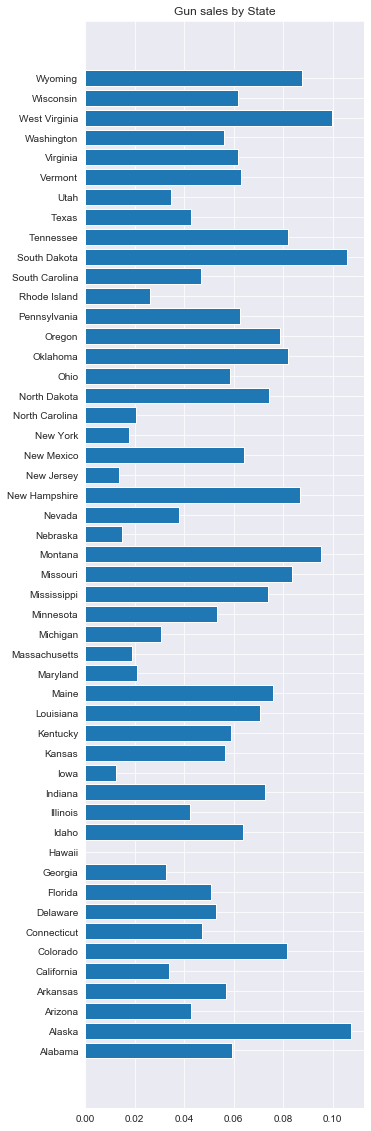

In [57]:

plt.figure(figsize = (5,20))

plt.barh(df['state'], df['gun_sales_2016']/df['population, 2016']);
plt.title('Gun sales by State')

### Question 1: How gun purchases vary with race


> The graph below shows how gun sales vary with the the proportion of white and black people in the state. There appears to be no correlation between these variables.

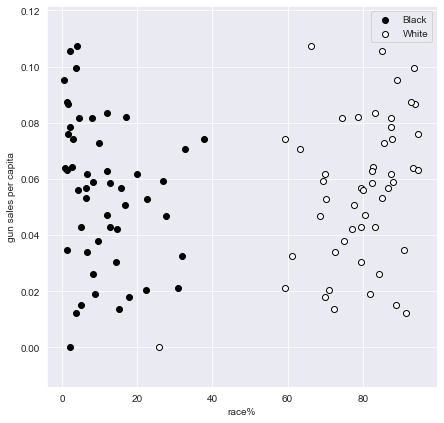

In [58]:
plt.figure(figsize = (7,7))

plt.scatter(df['Black%, 2016'], df['gun_sales_2016']/df['population, 2016'], color = 'k')
plt.scatter(df['White%, 2016'], df['gun_sales_2016']/df['population, 2016'], color = 'w', edgecolor = 'k')
plt.xlabel('race%')
plt.ylabel('gun sales per capita')
plt.legend(['Black', 'White']);

### Question 2: Does household income affect purchasing habits?

> When the data is not categorised and is just plot on a scatter graph, it is a lot more difficult to identify a trend. 

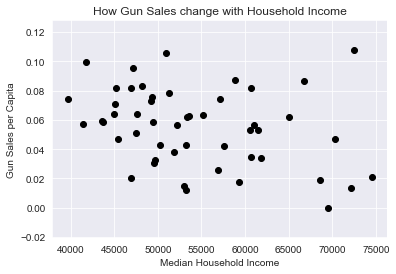

In [59]:
plt.scatter(df['median income($) 2011-2015'], df['gun_sales_2016']/df['population, 2016'], color = 'k')
plt.xlabel('Median Household Income')
plt.ylabel('Gun Sales per Capita')
plt.title('How Gun Sales change with Household Income');

> However when we group the income data, the relationship between household income and gun purchasing habits becomes clearer. 
>
> Whilst correlation does not equal causation, there appears to be a consistent inverse relationship between the variables over both 2016 and 2017.

In [60]:
# df['gun_sales_2016']/df['population, 2016']
df_inc = df.groupby('income').sum().reset_index()


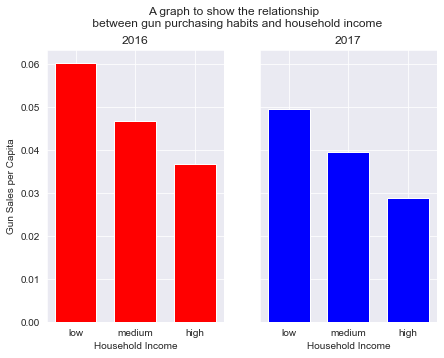

In [61]:
# subplot syntax was taken from matplotlib.org documentation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7,5), sharey = True)



ax1.bar(df_inc['income'].sort_values(), df_inc['gun_sales_2016']/df_inc['population, 2016'], color = 'r', width = 0.7, alpha = 1)
ax1.set_xlabel('Household Income')
ax1.set_ylabel('Gun Sales per Capita')
ax1.set_title('2016')
fig.suptitle('A graph to show the relationship \n between gun purchasing habits and household income', y = 1)


ax2.bar(df_inc['income'].sort_values(), df_inc['gun_sales_2017']/df_inc['population, 2016'], color = 'b', width = 0.7)
ax2.set_xlabel('Household Income')
ax2.set_title('2017');



###  Question 3: Is level of home ownership a good predictor of gun purchasing habits?

> The scatter plots below indicate a weak positive correlation between the two variables. However, if we eliminate the four  states with the lowest home ownership rate, the correlation is virtually non-existent.

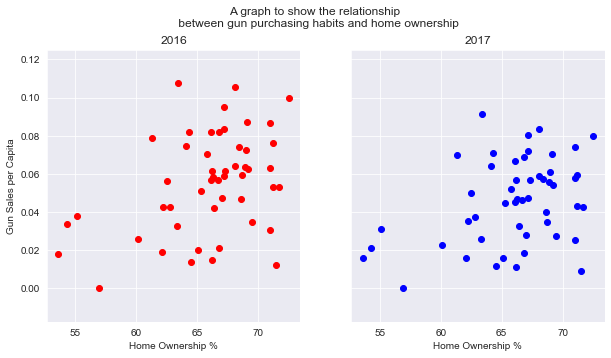

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5), sharey = True)



ax1.scatter(df['own_home% 2011-2015'], df['gun_sales_2016']/df['population, 2016'], color = 'r', alpha = 1)
ax1.set_xlabel('Home Ownership %')
ax1.set_ylabel('Gun Sales per Capita')
ax1.set_title('2016')
fig.suptitle('A graph to show the relationship \n between gun purchasing habits and home ownership', y = 1)


ax2.scatter(df['own_home% 2011-2015'], df['gun_sales_2017']/df['population, 2016'], color = 'b')
ax2.set_xlabel('Home Ownership %')
ax2.set_title('2017');

<a id='conclusions'></a>
## Conclusions

> To summarise, of the three variables considered, household income seems to be the best predictor of gun purchasing habits, followed by home ownership %. Racial demographic % appears to have no bearing on purchasing habits.
>
>Further analysis coud attempt to quantify these findings, rather than make qualitative judgments based on graphical visualisations.
>
